# Step 1: Data Acquisition

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport 
from cleaning_data import load_clean_data
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.dummy import DummyClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score 
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import LabelEncoder 
from plots import generate_histogram_plot, plot_channelid_distribution
from model import evaluate_classifier

%matplotlib inline

/Users/dametto/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/dametto/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
df = pd.read_csv("case_study_anonymized.csv", sep="|", encoding="latin")

# Step 2: Data Understanding

### 2.1 General Data Visualization (option 1)

In [3]:
#from profile_report import report 

In [4]:
#report()

### 2.2 General Data Visualization (option 2)

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'DEALKEY', 'DEALDETKEY', 'CUSTOMERID', 'CHANNELID',
       'CHANNELDSC', 'HAS_REAL_ORDER', 'DEALVALUE', 'DEALQTY', 'ORDER_PRICE',
       'ORIGINAL_PRICE', 'ORIGINAL_PRICE_NO_DISCOUNT_PERS', 'QUOTATION_DATE',
       'CUSTOMER_DISCOUNT_PERS', 'DISCOUNT_PCT', 'ARTID_DATE_CREATE', 'ARTID',
       'ARTDSC', 'BRANDID', 'CATEGORYID', 'CATEGORYDSC', 'BRANDDSC',
       'CUSTOMER_CREATE_DATE'],
      dtype='object')


In [6]:
# Checking the first few rows of the dataset
df.head() 

,Unnamed: 0,DEALKEY,DEALDETKEY,CUSTOMERID,CHANNELID,CHANNELDSC,HAS_REAL_ORDER,DEALVALUE,DEALQTY,ORDER_PRICE,...,CUSTOMER_DISCOUNT_PERS,DISCOUNT_PCT,ARTID_DATE_CREATE,ARTID,ARTDSC,BRANDID,CATEGORYID,CATEGORYDSC,BRANDDSC,CUSTOMER_CREATE_DATE
0,0,3682848.0,12089692.0,053e113f9b,SM,SALES UNIT MEDIUM BUSINESS,1,251.477800,1.0,251.477800,...,0.5,2.00,2013-08-28,FI-65F,FI-65F,FUJ,SH,SCANNER,FUJITSU,2011-02-01
1,1,3644306.0,11997831.0,b6fc01a771,CS,OFFICE PRODUCTS SALES AREA,1,67.257400,1.0,67.257400,...,0.0,2.00,2020-05-13,KCN-00032,SRFC GO TYPE COVER BLACK,SUA,AM,ACCESSORI TABLET E EBOOK READER,MICROSOFT SURFACE COMMERCIAL,2006-01-01
2,2,3683424.0,12091190.0,9b2a287a25,SM,SALES UNIT MEDIUM BUSINESS,1,51.887917,1.0,51.887917,...,0.0,1.41,2010-10-25,CE313A,126A MAGENTA LASERJET PRINT CARTR.,YHP,MC,MATERIALE DI CONSUMO,CONSUMABILI HP,2006-01-01
3,3,3656576.0,12027561.0,64354f1917,CS,OFFICE PRODUCTS SALES AREA,1,20.148800,1.0,20.148800,...,0.0,2.00,2015-12-17,NX090202106,CAVO DP/DP LSOH M/M MT10,NEO,EG,CAVI AUDIO-VIDEO,NILOX PC COMPONENTS,2006-01-01
4,4,3679663.0,12081975.0,df63f09ef0,SM,SALES UNIT MEDIUM BUSINESS,1,726.474000,1.0,726.474000,...,0.0,2.00,2017-05-15,9155101C,HELIOS IP VERSO - UNIT BASE CON CA,2NN,WV,VIDEOCITOFONI IP,2N,2006-01-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108014 entries, 0 to 108013
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       108014 non-null  int64  
 1   DEALKEY                          108014 non-null  float64
 2   DEALDETKEY                       108014 non-null  float64
 3   CUSTOMERID                       108014 non-null  object 
 4   CHANNELID                        108014 non-null  object 
 5   CHANNELDSC                       107364 non-null  object 
 6   HAS_REAL_ORDER                   108014 non-null  int64  
 7   DEALVALUE                        108014 non-null  float64
 8   DEALQTY                          108014 non-null  float64
 9   ORDER_PRICE                      108014 non-null  float64
 10  ORIGINAL_PRICE                   108014 non-null  float64
 11  ORIGINAL_PRICE_NO_DISCOUNT_PERS  108014 non-null  float64
 12  QU

In [8]:
#Check basic statistics 

df.describe()

,Unnamed: 0,DEALKEY,DEALDETKEY,HAS_REAL_ORDER,DEALVALUE,DEALQTY,ORDER_PRICE,ORIGINAL_PRICE,ORIGINAL_PRICE_NO_DISCOUNT_PERS,CUSTOMER_DISCOUNT_PERS,DISCOUNT_PCT
count,108014.000000,1.080140e+05,1.080140e+05,108014.000000,1.080140e+05,108014.000000,108014.000000,108014.000000,108014.000000,108014.000000,108014.000000
mean,54006.500000,3.691601e+06,1.211111e+07,0.619253,4.457051e+03,25.351371,355.071354,358.462433,361.172828,2.041828,1.688269
std,31181.100325,2.985011e+04,7.171239e+04,0.485573,9.681352e+05,745.411367,2122.667421,2123.990550,2212.070401,5.016779,3.529470
min,0.000000,3.639796e+06,1.198644e+07,0.000000,0.000000e+00,0.000000,0.009674,0.010000,0.010000,-20.000000,0.000000
25%,27003.250000,3.665658e+06,1.204908e+07,0.000000,4.198029e+01,1.000000,15.040000,15.525000,15.939000,0.000000,0.000000
50%,54006.500000,3.691903e+06,1.211143e+07,1.000000,1.990000e+02,2.000000,84.222825,85.000000,85.965000,0.000000,0.880000
75%,81009.750000,3.717626e+06,1.217342e+07,1.000000,7.859722e+02,5.000000,346.000000,351.185000,352.907400,0.000000,2.000000
max,108013.000000,3.743622e+06,1.223849e+07,1.000000,3.181615e+08,180000.000000,424215.380000,424215.380000,445426.149000,64.100000,40.000000


In [9]:
# Get the unique values of a variable 'VARIABLE' 
unique_categories = df['CHANNELID'].unique()

# Print the unique values
print(unique_categories)
print(len(unique_categories))

['SM' 'CS' 'CC' 'VE' 'VO' 'VS' 'VN' 'TE' 'GD' 'AN' 'FU' 'SD' '(null)' 'AP'
 'TC' 'AS' 'VC' 'BL' 'CO' 'GN' 'ML' 'GC' 'SP' 'DF' 'OD']
25


# Step 3: Data Preprocessing

In [10]:
dataset = load_clean_data()

### 3.1. Handling missing data

In [11]:
missing_values = dataset.isnull().sum()

# Calculate the percentage of missing values
percentage_missing = (missing_values / len(df)) * 100

# Create a summary of missing values
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Print the summary
print(missing_data_summary)

                                 Missing Values  Percentage Missing
Unnamed                                       0            0.000000
DEALKEY                                       0            0.000000
DEALDETKEY                                    0            0.000000
CUSTOMERID                                    0            0.000000
CHANNELID                                     0            0.000000
CHANNELDSC                                  650            0.601774
HAS_REAL_ORDER                                0            0.000000
DEALVALUE                                     0            0.000000
DEALQTY                                       0            0.000000
ORDER_PRICE                                   0            0.000000
ORIGINAL_PRICE                                0            0.000000
ORIGINAL_PRICE_NO_DISCOUNT_PERS               0            0.000000
QUOTATION_DATE                                0            0.000000
CUSTOMER_DISCOUNT_PERS                        0 

In [12]:
# Imputing a defined value
dataset['CHANNELDSC'] = dataset['CHANNELDSC'].fillna('(null)')

### 3.2 Check for duplicate rows

In [13]:
# Check for duplicate rows in the entire dataset
duplicate_rows = dataset[dataset.duplicated()]

# Print the count of duplicated rows
print(f"Number of duplicated rows: {len(duplicate_rows)}")

# Display the duplicated rows
print("Duplicated Rows:")
print(duplicate_rows)

Number of duplicated rows: 0
Duplicated Rows:
Empty DataFrame
Columns: [Unnamed, DEALKEY, DEALDETKEY, CUSTOMERID, CHANNELID, CHANNELDSC, HAS_REAL_ORDER, DEALVALUE, DEALQTY, ORDER_PRICE, ORIGINAL_PRICE, ORIGINAL_PRICE_NO_DISCOUNT_PERS, QUOTATION_DATE, CUSTOMER_DISCOUNT_PERS, DISCOUNT_PCT, ARTID_DATE_CREATE, ARTID, ARTDSC, BRANDID, CATEGORYID, CATEGORYDSC, BRANDDSC, CUSTOMER_CREATE_DATE]
Index: []

[0 rows x 23 columns]


### 3.3 Some Statistics

In [14]:
column_of_interest = 'ORDER_PRICE'

# Calculate summary statistics
mean = df[column_of_interest].mean()
median = df[column_of_interest].median()
std = df[column_of_interest].std()
maxx = df[column_of_interest].max()
minn = df[column_of_interest].min()

print(f"Mean of {column_of_interest}: {mean:.2f}")
print(f"Median of {column_of_interest}: {median:.2f}")
print(f"Standard Deviation of {column_of_interest}: {std:.2f}")
print(f"Maximum Value of {column_of_interest}: {maxx:.2f}")
print(f"Minimum Value of {column_of_interest}: {minn:.2f}")

Mean of ORDER_PRICE: 355.07
Median of ORDER_PRICE: 84.22
Standard Deviation of ORDER_PRICE: 2122.67
Maximum Value of ORDER_PRICE: 424215.38
Minimum Value of ORDER_PRICE: 0.01


### Distribution of Acceptance and Rejection Rates

To achieve the objective of analyzing the dataset to extract meaningful insights and develop a predictive model for the acceptance or rejection of a quotation (HAS REAL ORDER), it's important to identify interesting variables and correlations that can help in achieving this goal. 

In [15]:
var_interest = 'HAS_REAL_ORDER'

# Count the occurrences of each unique value
order_counts = df[var_interest].value_counts()

# Calculate the percentage of values 0 (Rejection) and 1 (Acceptance)
percentage_0 = (order_counts[0] / len(df)) * 100
percentage_1 = (order_counts[1] / len(df)) * 100

print(f'Percentage of Rejection: {percentage_0:.2f}%')
print(f'Percentage of Acceptance: {percentage_1:.2f}%')

Percentage of Rejection: 38.07%
Percentage of Acceptance: 61.93%


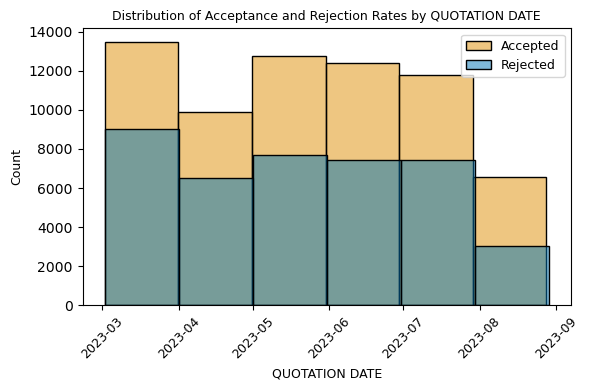

In [16]:
# Distribution of Acceptance and Rejection Rates by QUOTATION DATE'
generate_histogram_plot(
    accepted_data=dataset[dataset['HAS_REAL_ORDER'] == '1'],
    rejected_data=dataset[dataset['HAS_REAL_ORDER'] == '0'],
    x='QUOTATION_DATE',
    bins=6,
    kde=False,
    label_accepted='Accepted',
    label_rejected='Rejected',
    palette='colorblind',
    hue='HAS_REAL_ORDER',
    rot=45,
    xlabel='QUOTATION DATE',
    ylabel='Count',
    title='Distribution of Acceptance and Rejection Rates by QUOTATION DATE'
)


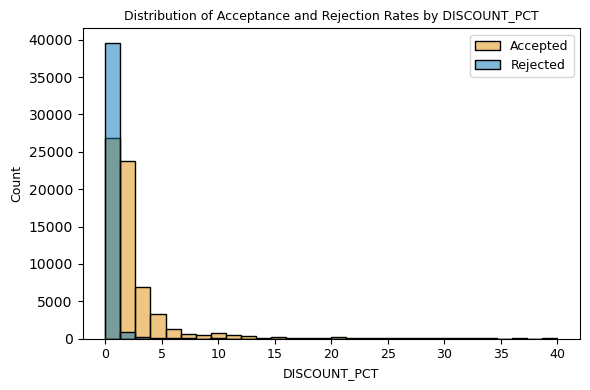

In [17]:
# Distribution of acceptance rate by DISCOUNT PCT

generate_histogram_plot(
    accepted_data=dataset[dataset['HAS_REAL_ORDER'] == '1'],
    rejected_data=dataset[dataset['HAS_REAL_ORDER'] == '0'],
    x='DISCOUNT_PCT',
    bins=30,
    kde=False,
    label_accepted='Accepted',
    label_rejected='Rejected',
    palette='colorblind',
    hue='HAS_REAL_ORDER',
    rot=0,
    xlabel='DISCOUNT_PCT',
    ylabel='Count',
    title='Distribution of Acceptance and Rejection Rates by DISCOUNT_PCT'
)

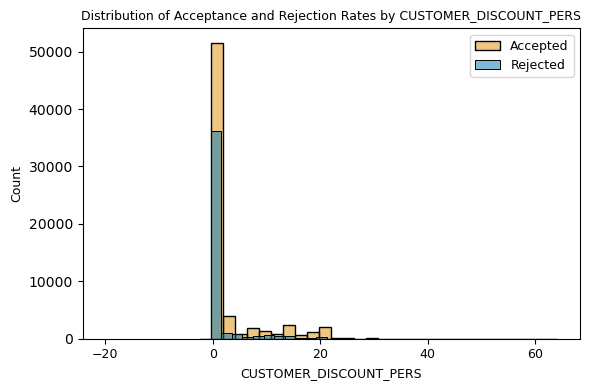

In [18]:
# Distribution of acceptance rate by CUSTOMER_DISCOUNT_PERS
generate_histogram_plot(
    accepted_data=dataset[dataset['HAS_REAL_ORDER'] == '1'],
    rejected_data=dataset[dataset['HAS_REAL_ORDER'] == '0'],
    x='CUSTOMER_DISCOUNT_PERS',
    bins=30,
    kde=False,
    label_accepted='Accepted',
    label_rejected='Rejected',
    palette='colorblind',
    hue='HAS_REAL_ORDER',
    rot=0,
    xlabel='CUSTOMER_DISCOUNT_PERS',
    ylabel='Count',
    title='Distribution of Acceptance and Rejection Rates by CUSTOMER_DISCOUNT_PERS'
)

In [19]:
column_of_interest = 'CUSTOMER_DISCOUNT_PERS'

# Calculate summary statistics
mean = df[column_of_interest].mean()
median = df[column_of_interest].median()
std = df[column_of_interest].std()
maxx = df[column_of_interest].max()
minn = df[column_of_interest].min()

print(f"Mean of {column_of_interest}: {mean:.2f}")
print(f"Median of {column_of_interest}: {median:.2f}")
print(f"Standard Deviation of {column_of_interest}: {std:.2f}")
print(f"Maximum Value of {column_of_interest}: {maxx:.2f}")
print(f"Minimum Value of {column_of_interest}: {minn:.2f}")

Mean of CUSTOMER_DISCOUNT_PERS: 2.04
Median of CUSTOMER_DISCOUNT_PERS: 0.00
Standard Deviation of CUSTOMER_DISCOUNT_PERS: 5.02
Maximum Value of CUSTOMER_DISCOUNT_PERS: 64.10
Minimum Value of CUSTOMER_DISCOUNT_PERS: -20.00


In [20]:
count_negative_discounts = (df['CUSTOMER_DISCOUNT_PERS'] < 0).sum()
print("Number of occurrences where CUSTOMER_DISCOUNT_PERS < 0:", count_negative_discounts)

Number of occurrences where CUSTOMER_DISCOUNT_PERS < 0: 12


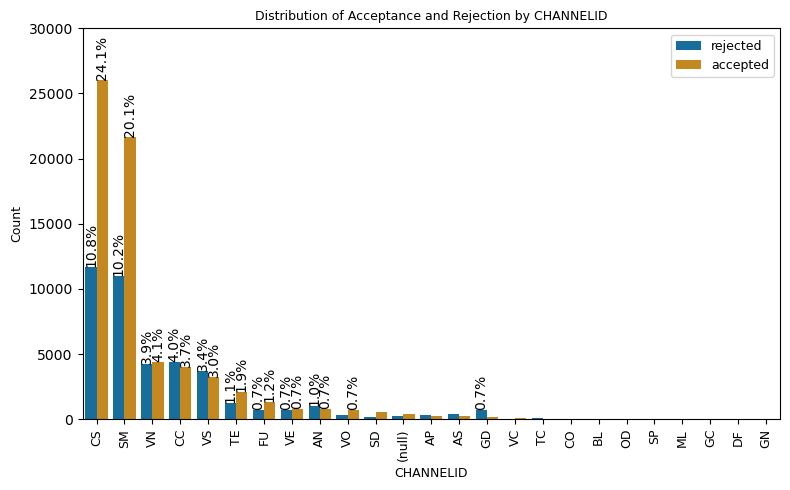

In [21]:
#Distribution of Acceptance and Rejection Rates by CHANNEL ID
plot_channelid_distribution(dataset)

# Step 5: Model + Model Evaluation

In [22]:
#from model import evaluate_classifier

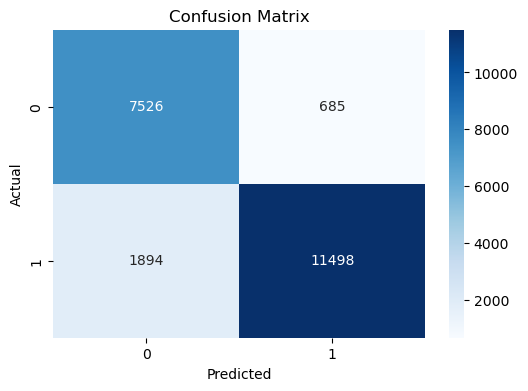

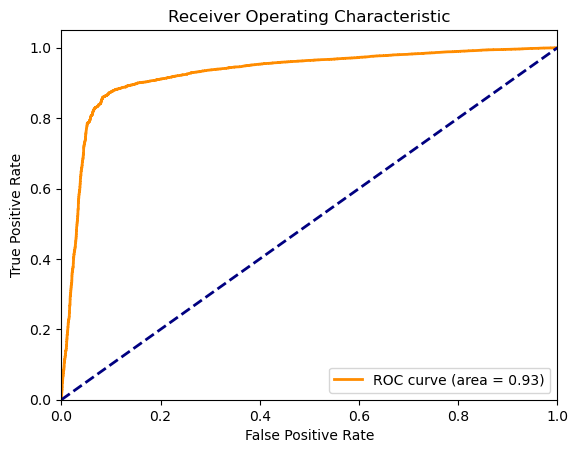

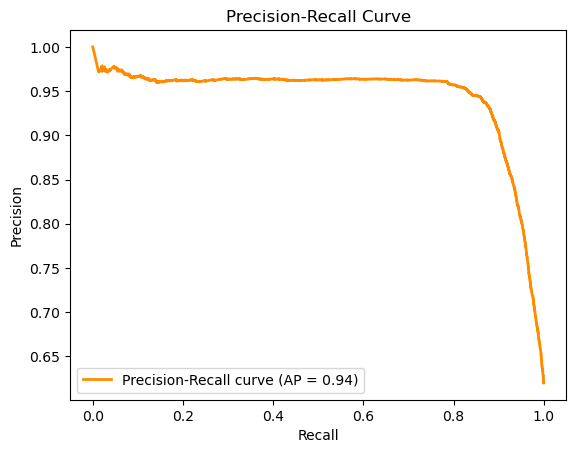

Metrics for LogisticRegression:
Accuracy: 0.88
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.92      0.85      8211
           1       0.94      0.86      0.90     13392

    accuracy                           0.88     21603
   macro avg       0.87      0.89      0.88     21603
weighted avg       0.89      0.88      0.88     21603

Confusion Matrix: [[ 7526   685]
 [ 1894 11498]]
AUC Score: 0.89




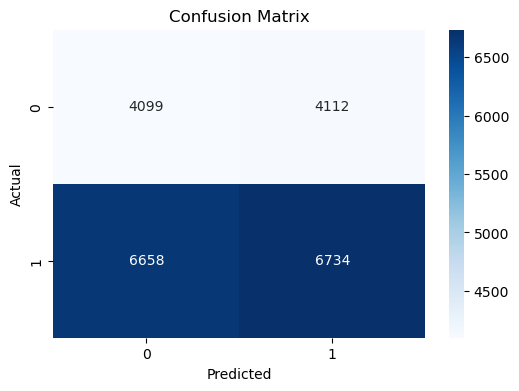

Metrics for DummyClassifier:
Accuracy: 0.50
Classification Report:               precision    recall  f1-score   support

           0       0.38      0.50      0.43      8211
           1       0.62      0.50      0.56     13392

    accuracy                           0.50     21603
   macro avg       0.50      0.50      0.49     21603
weighted avg       0.53      0.50      0.51     21603

Confusion Matrix: [[4099 4112]
 [6658 6734]]
AUC Score: 0.50




In [23]:
classifiers = ['LogisticRegression', 'DummyClassifier']

for classifier in classifiers:
    metrics = evaluate_classifier(dataset, classifier)
    
    print(f"Metrics for {classifier}:")
    for metric_name, metric_value in metrics.items():
        if isinstance(metric_value, (int, float)):
            print(f"{metric_name}: {metric_value:.2f}")
        else:
            print(f"{metric_name}: {metric_value}")
    print("\n")